In [10]:
import numpy as np
import pandas as pd
import sys
import time
from os import system, name
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 7})
from scipy.optimize import minimize

In [11]:
def clear():
 
    # for windows
    if name == 'nt':
        _ = system('cls')
 
    # for mac and linux(here, os.name is 'posix')
    else:
        _ = system('clear')

In [22]:
ref = [
    '1080i5994',
    '720p5994',
    '525i5994',
    '1080i5000',
    '720p5000',
    '625i5000'
]

df = pd.read_csv("log_ref_timing.csv")

tbl = df.groupby(["Ref_Format", "Video_Format"], as_index = False)["H_Timing"].aggregate(np.mean)

In [23]:
def ref_graph(refvar, vidvar):
    idxb = tbl["Ref_Format"].str.match(r"^" + refvar +"")
    tblref = tbl.loc[idxb].sort_values("Video_Format")
    dfrefindex = df["Ref_Format"].str.match(r"^" + refvar +"")
    dfref = df.loc[dfrefindex].sort_values("Video_Format")
    grpintsref = pd.factorize(dfref["Video_Format"])
    grpintstblref = pd.factorize(tblref["Video_Format"])

    N = dfref.shape[0]

    plt.scatter(grpintsref[0] + np.random.uniform(-0.2, 0.2, size = N),
            dfref["H_Timing"], alpha = 0.1)

    plt.scatter(grpintstblref[0], tblref["H_Timing"])

    plt.xlabel("Video Format");
    plt.ylabel("Time Variation in Microseconds - ref =" + refvar);
    
    if (vidvar == 'ntsc'):
        plt.xticks(ticks = [0,1,2,3], labels=['1080i5994', '1080p5994', '525i5994', '720p5994']);
    else :
        plt.xticks(ticks = [0,1,2,3], labels=['1080i5000', '1080p5000', '625i5000', '720p5000']);


Select a Reference format or 6 to exit

0 : 1080i5994
1 : 720p5994
2 : 525i5994
3 : 1080i5000
4 : 720p5000
5 : 625i5000


 5


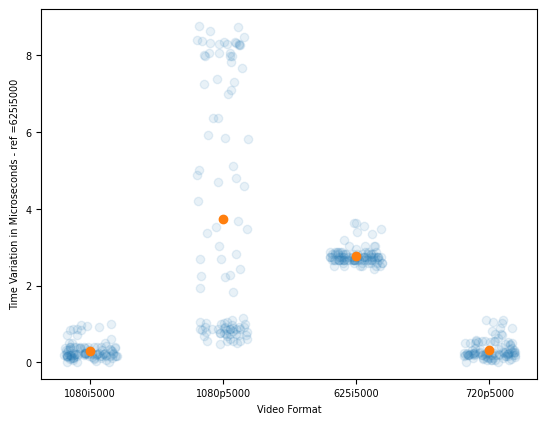

In [19]:
### Running through main I have to exit (select 6 to break the loop) to get the scatter plot to show up.

def main(args):
    
    select = 0
    
    while select != 6:
        
        clear()
        
        #Clear Screen
    
        print("\nSelect a Reference format or 6 to exit\n")

        for i, val in enumerate(ref):
            print (i, ":",val)

        print("6 : Exit")
        
        select=input()
                
        select = int(select)
        
        if (0 <= select <= 2):
            vidvar = "ntsc"
            
        if (3 <= select <= 5):
            vidvar = "pal"
        
        if 0 <= select <= 5:
            refvar = str(ref[select])
            ref_graph(refvar, vidvar)

if __name__ == '__main__':
    main(sys.argv[1:])


### Below here works for running the notebook again and again


# select = 0

# while select != 6:

#     #clear()

#     #Clear Screen

# print("\nSelect a Reference format or 6 to exit\n")

# for i, val in enumerate(ref):
#     print (i, ":",val)

# #print("6 : Exit")

# select=input()

# select = int(select)

# if (0 <= select <= 2):
#     vidvar = "ntsc"

# if (3 <= select <= 5):
#     vidvar = "pal"

# if 0 <= select <= 5:
#     refvar = str(ref[select])
#     ref_graph(refvar, vidvar)